In [21]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56) 
[GCC 7.2.0]
Scipy: 1.1.0
Numpy: 1.14.5
Matplotlib: 2.2.2
Pandas: 0.23.4
Sklearn: 0.19.1


In [22]:
import pandas 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder

In [23]:
# loading the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width' ,'petal-length', 'class']
dataset = read_csv(url, names=names)

In [24]:
#dimensions of the dataset
print(dataset.shape)

(150, 4)


In [25]:
# created a instance of label encoder
lb = LabelEncoder()

In [26]:
dataset.iloc[:,3] = lb.fit_transform(dataset.iloc[:,3])

In [27]:
dataset['class']= lb.fit_transform(dataset['class']) 

dataset['class'].unique()

array([0, 1, 2])

In [28]:
# statistical summary
print(dataset.describe())

       sepal-length  sepal-width  petal-length       class
count    150.000000   150.000000    150.000000  150.000000
mean       3.054000     3.758667      1.198667    1.000000
std        0.433594     1.764420      0.763161    0.819232
min        2.000000     1.000000      0.100000    0.000000
25%        2.800000     1.600000      0.300000    0.000000
50%        3.000000     4.350000      1.300000    1.000000
75%        3.300000     5.100000      1.800000    2.000000
max        4.400000     6.900000      2.500000    2.000000


In [29]:
# class distribution
print(dataset.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


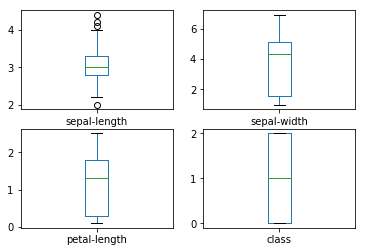

In [30]:
# univariate plots - box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

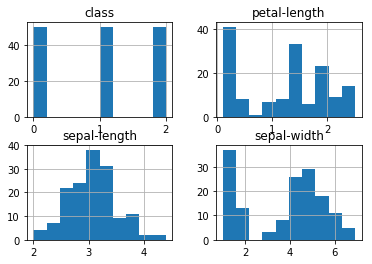

In [31]:
# histogram of the variable
dataset.hist()
pyplot.show()

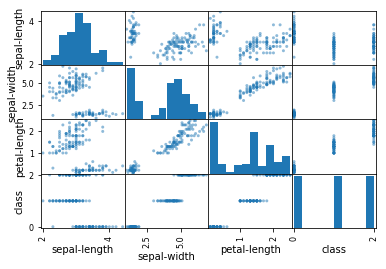

In [32]:
# multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [33]:
# creating a validation dataset
# splitting dataset
array = dataset.values
X = array[:, 0:4]
Y = array[:, 3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

In [34]:
# Logistic Regression
# Linear Discriminant Analysis
# K-Nearest neighbors
# Classification and Regression Tree
# Gaussian Naive Bayes
# Support Vector Machine

# building models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


In [35]:
print(dataset.head(30))

     sepal-length  sepal-width  petal-length  class
5.1           3.5          1.4           0.2      0
4.9           3.0          1.4           0.2      0
4.7           3.2          1.3           0.2      0
4.6           3.1          1.5           0.2      0
5.0           3.6          1.4           0.2      0
5.4           3.9          1.7           0.4      0
4.6           3.4          1.4           0.3      0
5.0           3.4          1.5           0.2      0
4.4           2.9          1.4           0.2      0
4.9           3.1          1.5           0.1      0
5.4           3.7          1.5           0.2      0
4.8           3.4          1.6           0.2      0
4.8           3.0          1.4           0.1      0
4.3           3.0          1.1           0.1      0
5.8           4.0          1.2           0.2      0
5.7           4.4          1.5           0.4      0
5.4           3.9          1.3           0.4      0
5.1           3.5          1.4           0.3      0
5.7         

In [36]:
# evaluate the created models
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR 1.000000 (0.000000)
LDA 0.973974 (0.040110)
KNN 1.000000 (0.000000)
NB 1.000000 (0.000000)
SVM 1.000000 (0.000000)


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.


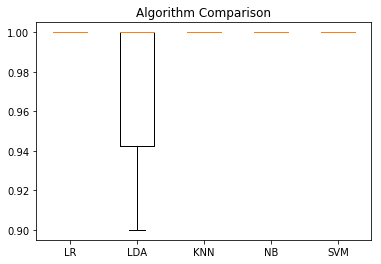

In [37]:
# compare our models
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [38]:
# make predictions on svm
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [40]:
# evaluate our predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        11
        1.0       1.00      1.00      1.00        13
        2.0       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

